# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [26]:
import main
import scipy as sp
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


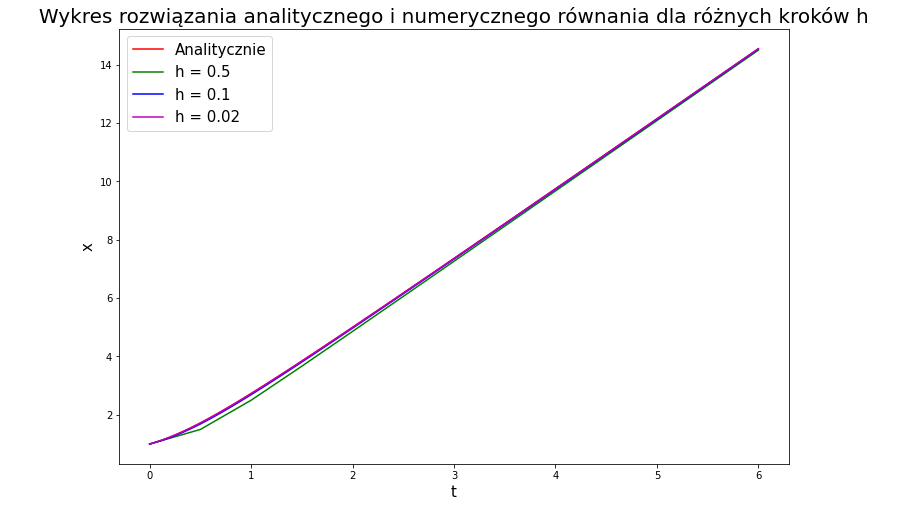

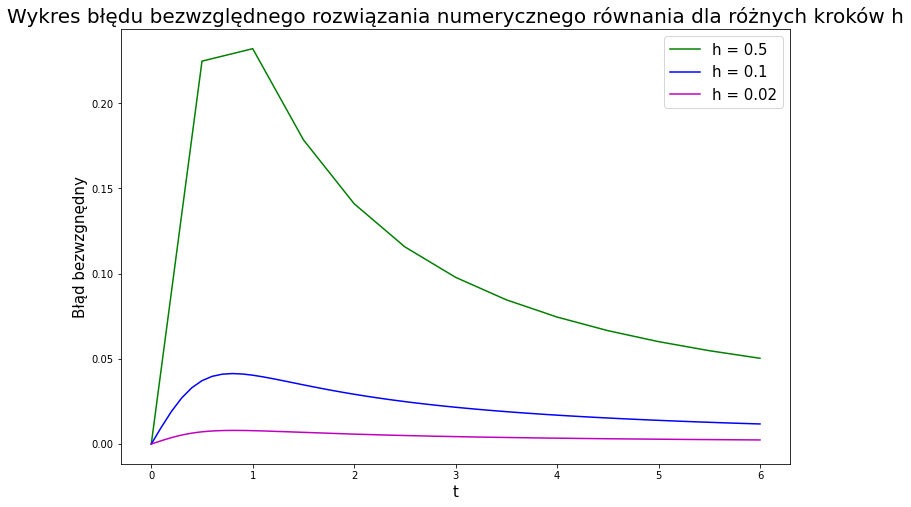

In [27]:
def fun(t,y):
    yr = (y + t)/(y - t)
    return yr

def sol(t):
    y = t + np.sqrt(1 + 2 * (t ** 2))
    return y

plt.figure(figsize=(12, 8))
t = np.arange(0,6+0.001,0.001)
plt.plot(t,sol(t),color='r')

y0 = np.array([1])
y_err = []
t_err = []
color=['g','b','m']
for h,color in zip([0.5,0.1,0.02],color):
    t = np.arange(0,6+h,h)
    x = main.solve_euler(fun,t,y0)
    y_err.append(np.abs(x.reshape((len(t),)) - sol(t)))
    t_err.append(t)
    plt.plot(t,x,color=color)
plt.legend(['Analitycznie','h = 0.5','h = 0.1', 'h = 0.02'],fontsize=15)
plt.title('     Wykres rozwiązania analitycznego i numerycznego równania dla różnych kroków h     ',fontsize=20)
plt.xlabel('t',fontsize=15)
plt.ylabel('x',fontsize=15)
plt.show()

plt.figure(figsize=(12, 8))
color=['g','b','m']
for er,t,color in zip(y_err,t_err,color):
    plt.plot(t,er,color=color)
plt.legend(['h = 0.5','h = 0.1', 'h = 0.02'],fontsize=15)
plt.title('Wykres błędu bezwzględnego rozwiązania numerycznego równania dla różnych kroków h',fontsize=20)
plt.xlabel('t',fontsize=15)
plt.ylabel('Błąd bezwzgnędny',fontsize=15)
plt.show()

Dla zadanego równania różniczkowego już dla kroku h = 0,1 można uzyskać przy pomocy metody Eulera bardzo dobre przybliżenie szukanej funkcji na przedziale od 0 do 6, z maksymalnym błędem na poziomie około 0,05. Błąd od pewnego t maleje wraz z większymi argumentami, co świadczy o dobrym uwarunkowaniu rozwiązania na tym przedziale.

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

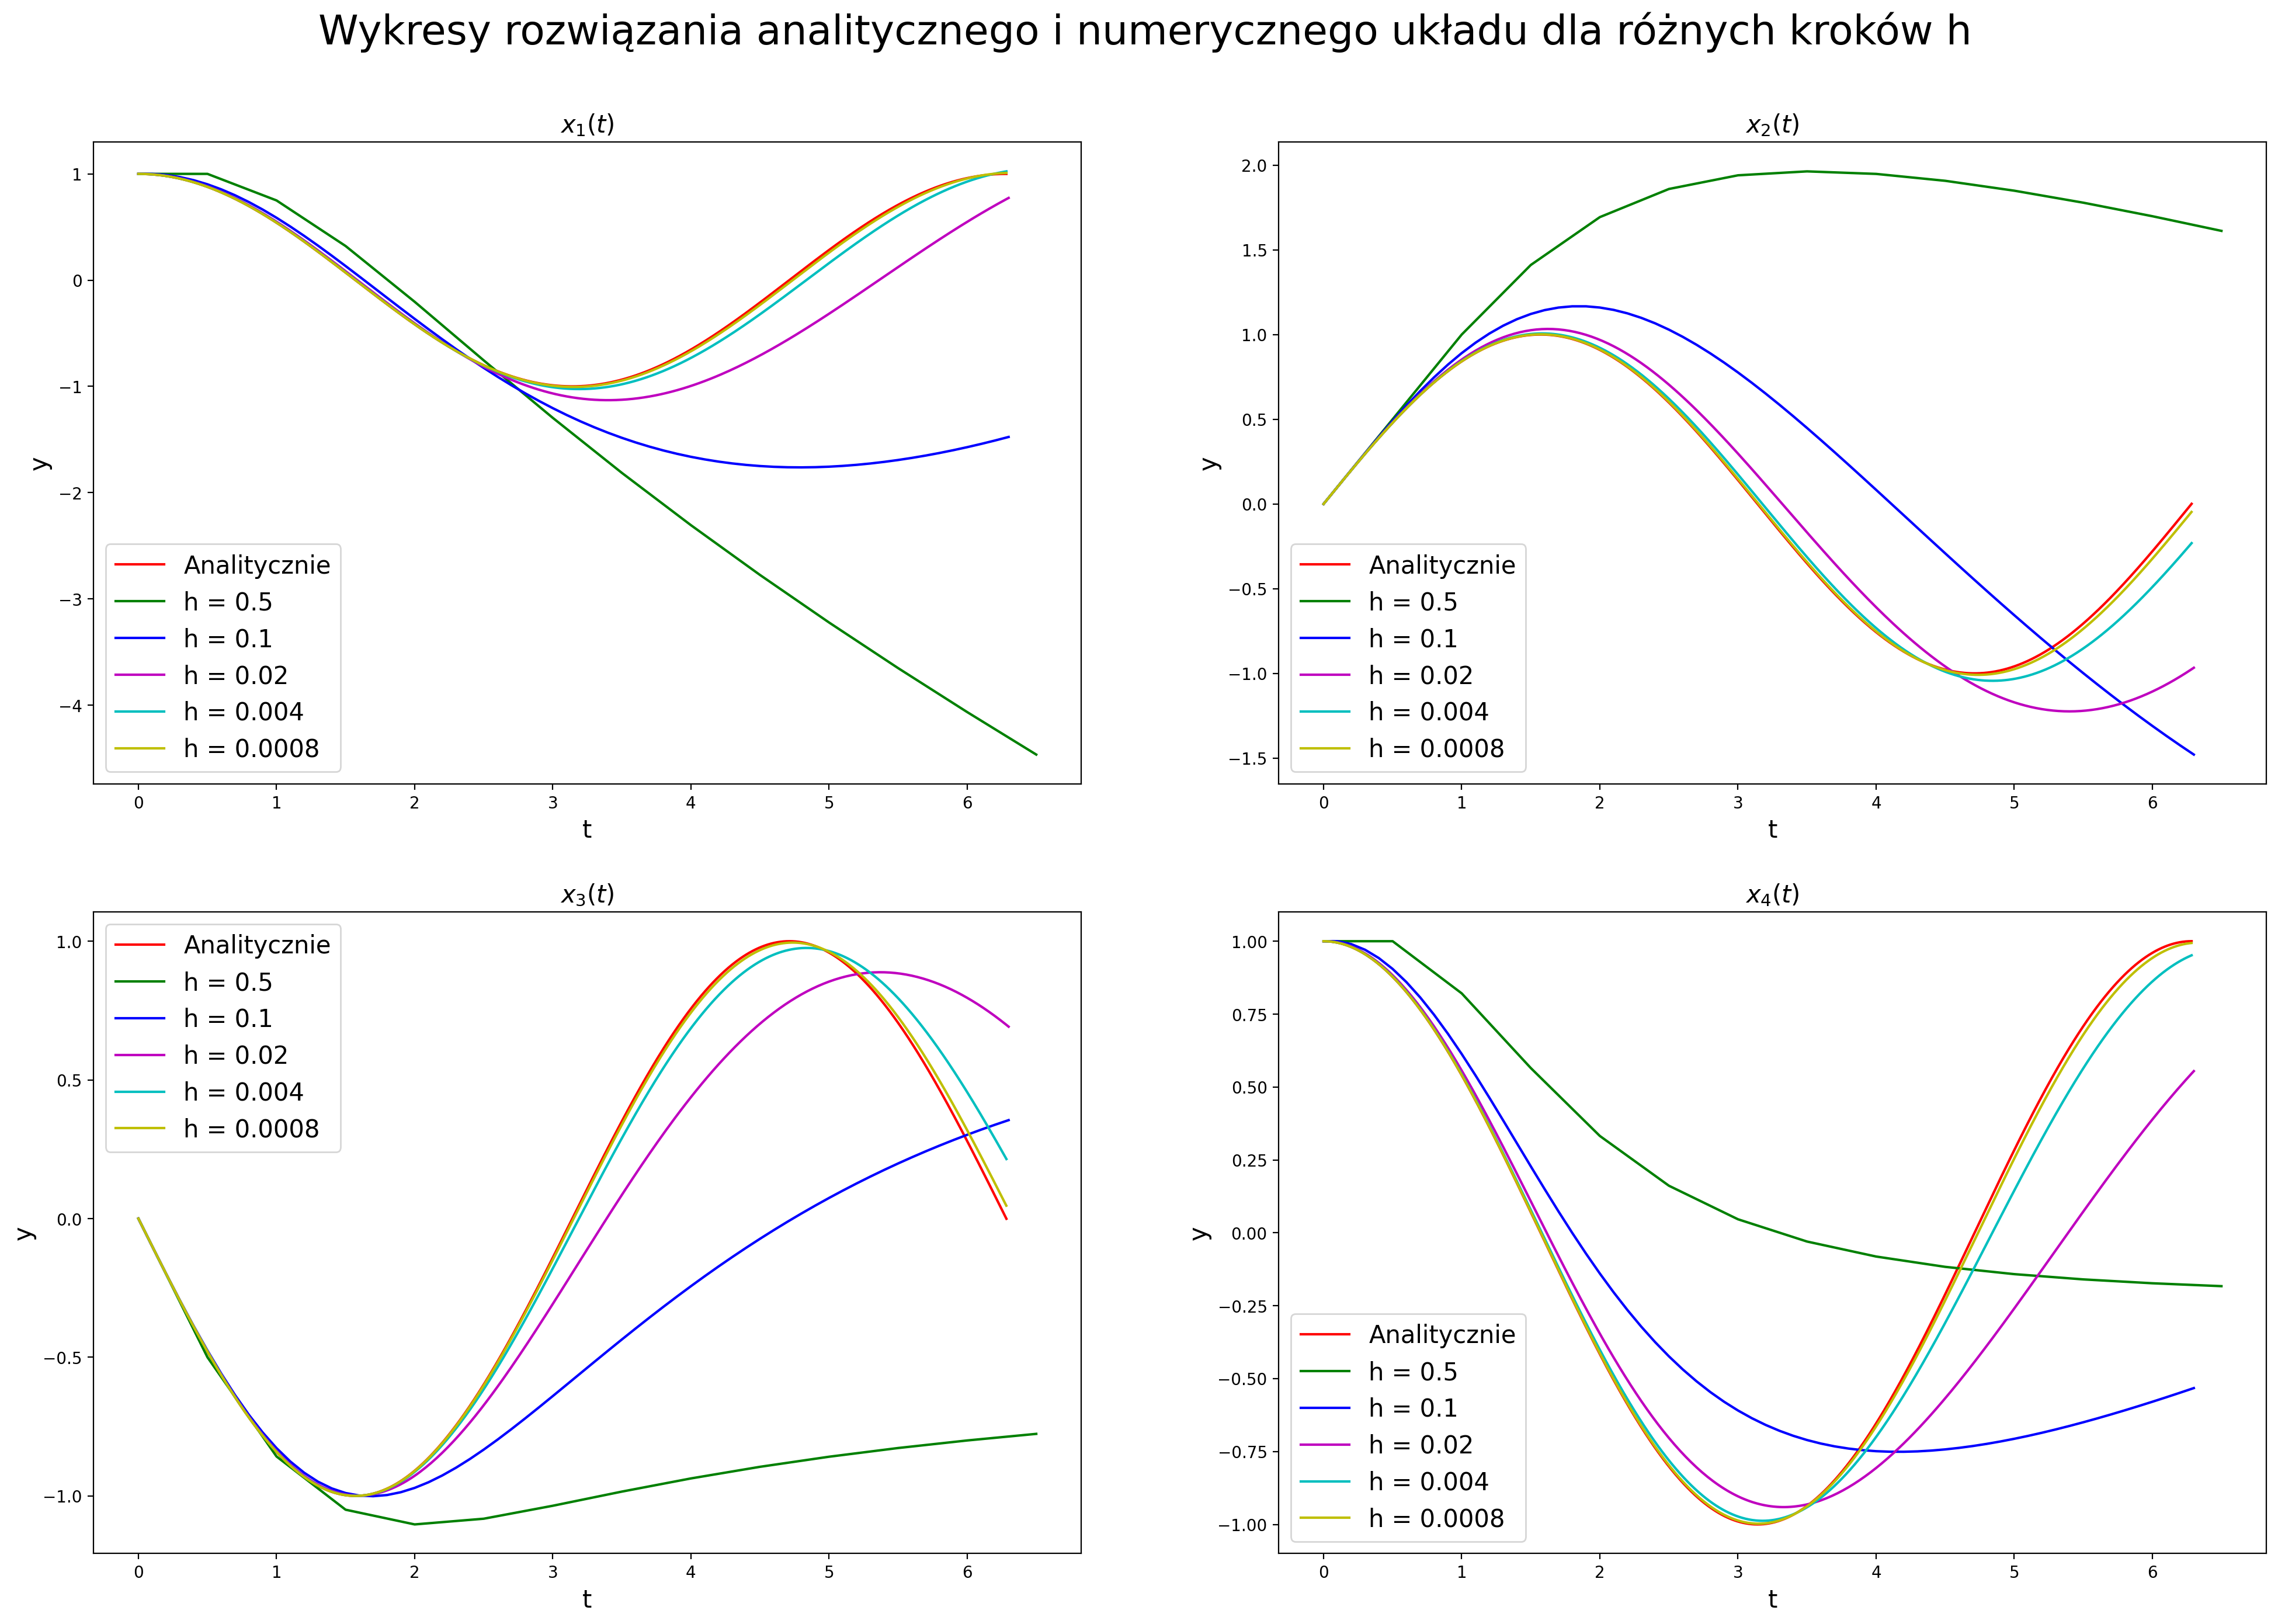

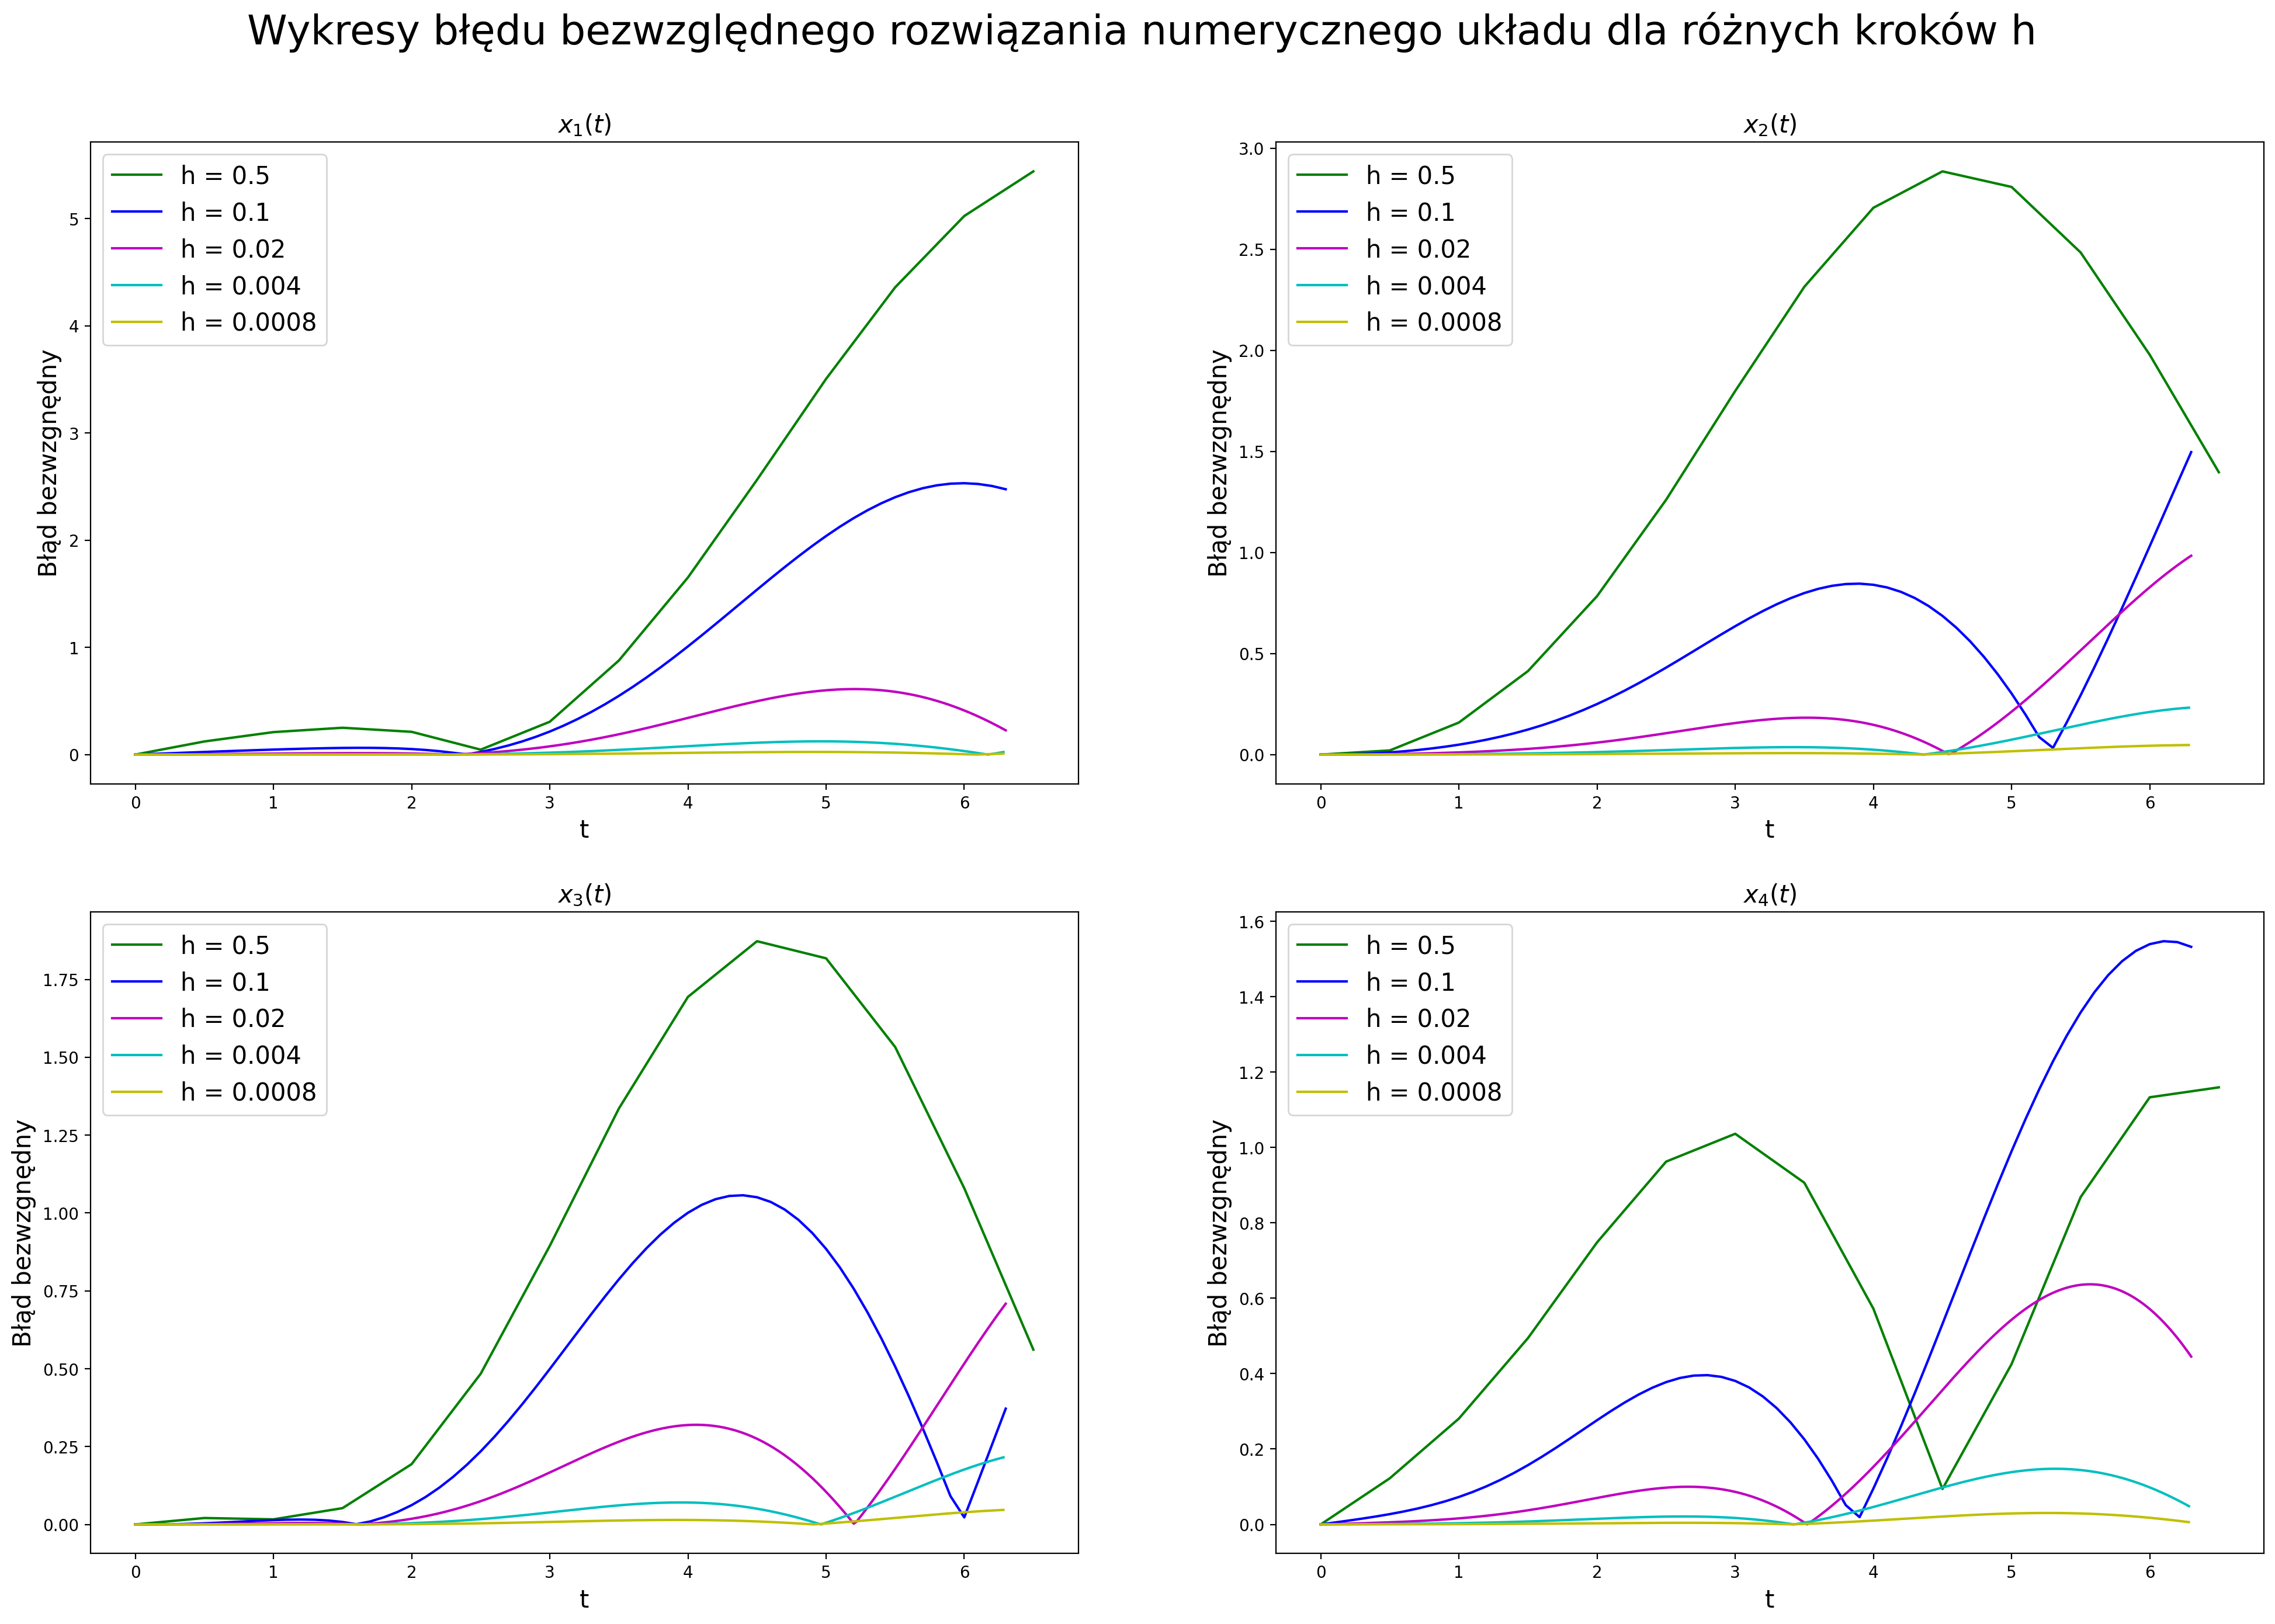

In [28]:
def fun(t,y):
    yr = [y[2],y[3],-(y[0])/(y[0]**2 + y[1]**2)**(3/2),-(y[1])/(y[0]**2 + y[1]**2)**(3/2)]
    return np.array(yr)

def sol(t):
    yr = [np.cos(t), np.sin(t), -np.sin(t), np.cos(t)]
    return np.array(yr)

fig, ax = plt.subplots(2, 2, figsize=(24, 16), dpi=200)
t = np.arange(0,2*np.pi+0.001,0.001)
solution = sol(t)
ax[0][0].plot(t,solution[0],color='r')
ax[0][1].plot(t,solution[1],color='r')
ax[1][0].plot(t,solution[2],color='r')
ax[1][1].plot(t,solution[3],color='r')

y0 = np.array([1, 0, 0, 1])
y_err = []
t_err = []
color=['g','b','m','c','y']
for h,color in zip([0.5,0.1,0.02,0.004,0.0008],color):
    t = np.arange(0,2*np.pi+h,h)
    x = main.solve_euler(fun,t,y0)
    solution = np.transpose(sol(t))
    y_err.append(np.abs(x - solution))
    t_err.append(t)
    ax[0][0].plot(t,x[:,0],color=color)
    ax[0][1].plot(t,x[:,1],color=color)
    ax[1][0].plot(t,x[:,2],color=color)
    ax[1][1].plot(t,x[:,3],color=color)
ax[0][0].set_title('$x_1(t)$',fontsize=15)
ax[0][1].set_title('$x_2(t)$',fontsize=15)
ax[1][0].set_title('$x_3(t)$',fontsize=15)
ax[1][1].set_title('$x_4(t)$',fontsize=15)
ax[0][0].set_xlabel('t',fontsize=15)
ax[0][1].set_xlabel('t',fontsize=15)
ax[1][0].set_xlabel('t',fontsize=15)
ax[1][1].set_xlabel('t',fontsize=15)
ax[0][0].set_ylabel('y',fontsize=15)
ax[0][1].set_ylabel('y',fontsize=15)
ax[1][0].set_ylabel('y',fontsize=15)
ax[1][1].set_ylabel('y',fontsize=15)
ax[0][0].legend(['Analitycznie','h = 0.5','h = 0.1', 'h = 0.02','h = 0.004','h = 0.0008'],fontsize=15,loc='best')
ax[0][1].legend(['Analitycznie','h = 0.5','h = 0.1', 'h = 0.02','h = 0.004','h = 0.0008'],fontsize=15,loc='best')
ax[1][0].legend(['Analitycznie','h = 0.5','h = 0.1', 'h = 0.02','h = 0.004','h = 0.0008'],fontsize=15,loc='best')
ax[1][1].legend(['Analitycznie','h = 0.5','h = 0.1', 'h = 0.02','h = 0.004','h = 0.0008'],fontsize=15,loc='best')
fig.suptitle('Wykresy rozwiązania analitycznego i numerycznego układu dla różnych kroków h',fontsize=25,y=0.95)
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(24, 16), dpi=200)
color=['g','b','m','c','y']
for er,t,color in zip(y_err,t_err,color):
    ax[0][0].plot(t,er[:,0],color=color)
    ax[0][1].plot(t,er[:,1],color=color)
    ax[1][0].plot(t,er[:,2],color=color)
    ax[1][1].plot(t,er[:,3],color=color)
ax[0][0].set_title('$x_1(t)$',fontsize=15)
ax[0][1].set_title('$x_2(t)$',fontsize=15)
ax[1][0].set_title('$x_3(t)$',fontsize=15)
ax[1][1].set_title('$x_4(t)$',fontsize=15)
ax[0][0].set_xlabel('t',fontsize=15)
ax[0][1].set_xlabel('t',fontsize=15)
ax[1][0].set_xlabel('t',fontsize=15)
ax[1][1].set_xlabel('t',fontsize=15)
ax[0][0].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[0][1].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[1][0].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[1][1].set_ylabel('Błąd bezwzgnędny',fontsize=15)
ax[0][0].legend(['h = 0.5','h = 0.1', 'h = 0.02','h = 0.004','h = 0.0008'],fontsize=15,loc='best')
ax[0][1].legend(['h = 0.5','h = 0.1', 'h = 0.02','h = 0.004','h = 0.0008'],fontsize=15,loc='best')
ax[1][0].legend(['h = 0.5','h = 0.1', 'h = 0.02','h = 0.004','h = 0.0008'],fontsize=15,loc='best')
ax[1][1].legend(['h = 0.5','h = 0.1', 'h = 0.02','h = 0.004','h = 0.0008'],fontsize=15,loc='best')
fig.suptitle('Wykresy błędu bezwzględnego rozwiązania numerycznego układu dla różnych kroków h',fontsize=25,y=0.95)
plt.show()

W odróżnieniu od poprzedniego zadania w tym przypadku widać, że aby otrzymać rozwiązanie zbliżone na dobrym poziomie do oryginału wyliczonego analitycznie należy użyć dużo mniejszego kroku. Sensownie przybliżone rozwiązanie otrzymałem bowiem dopiero dla kroku h = 0.0008. Może to wynikać z charakteru pochodnych rozwiązań, które często zmieniają znak, ponieważ rozwiązania właśnie w tych punktach zdają się odbiegać od oryginału wyliczonego analitycznie. W tym zadaniu niestety nie występuje również zjawisko zaniku błędu w miarę przyrostu argumentów, a wręcz odwrotnie - rozwiązania numeryczne w szczególności dla za małych kroków h zdają się 'uciekać' od rozwiązania analitycznego dla rosnącego t. Na podstawie wykresów można wysnuć wniosek, że nawet dla najmniejszego h rozwiązanie numeryczne w nieskończonym t nie odwzoruje dobrze szukanej funkcji dlatego ważne jest aby podczas rozwiązywania tego typu problemów, dobierając krok zważać na przedział w którym chcemy znaleźć rozwiązanie.

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

C:\Users\micha\AppData\Local\Temp/ipykernel_19816/426514411.py:2: RuntimeWarning: overflow encountered in double_scalars
  yr = [-667 * y[0] + 333 * y[1], 666 * y[0] - 334 * y[1]]
C:\Users\micha\Desktop\Materialy do nauki\Studia 3 semestr\Metody_Numeryczne\laboratorium-12-Michal-Szmuksta-AGH\main.py:23: RuntimeWarning: invalid value encountered in add
  y[n+1] = y[n] + h * fun(t_span[n], y[n])


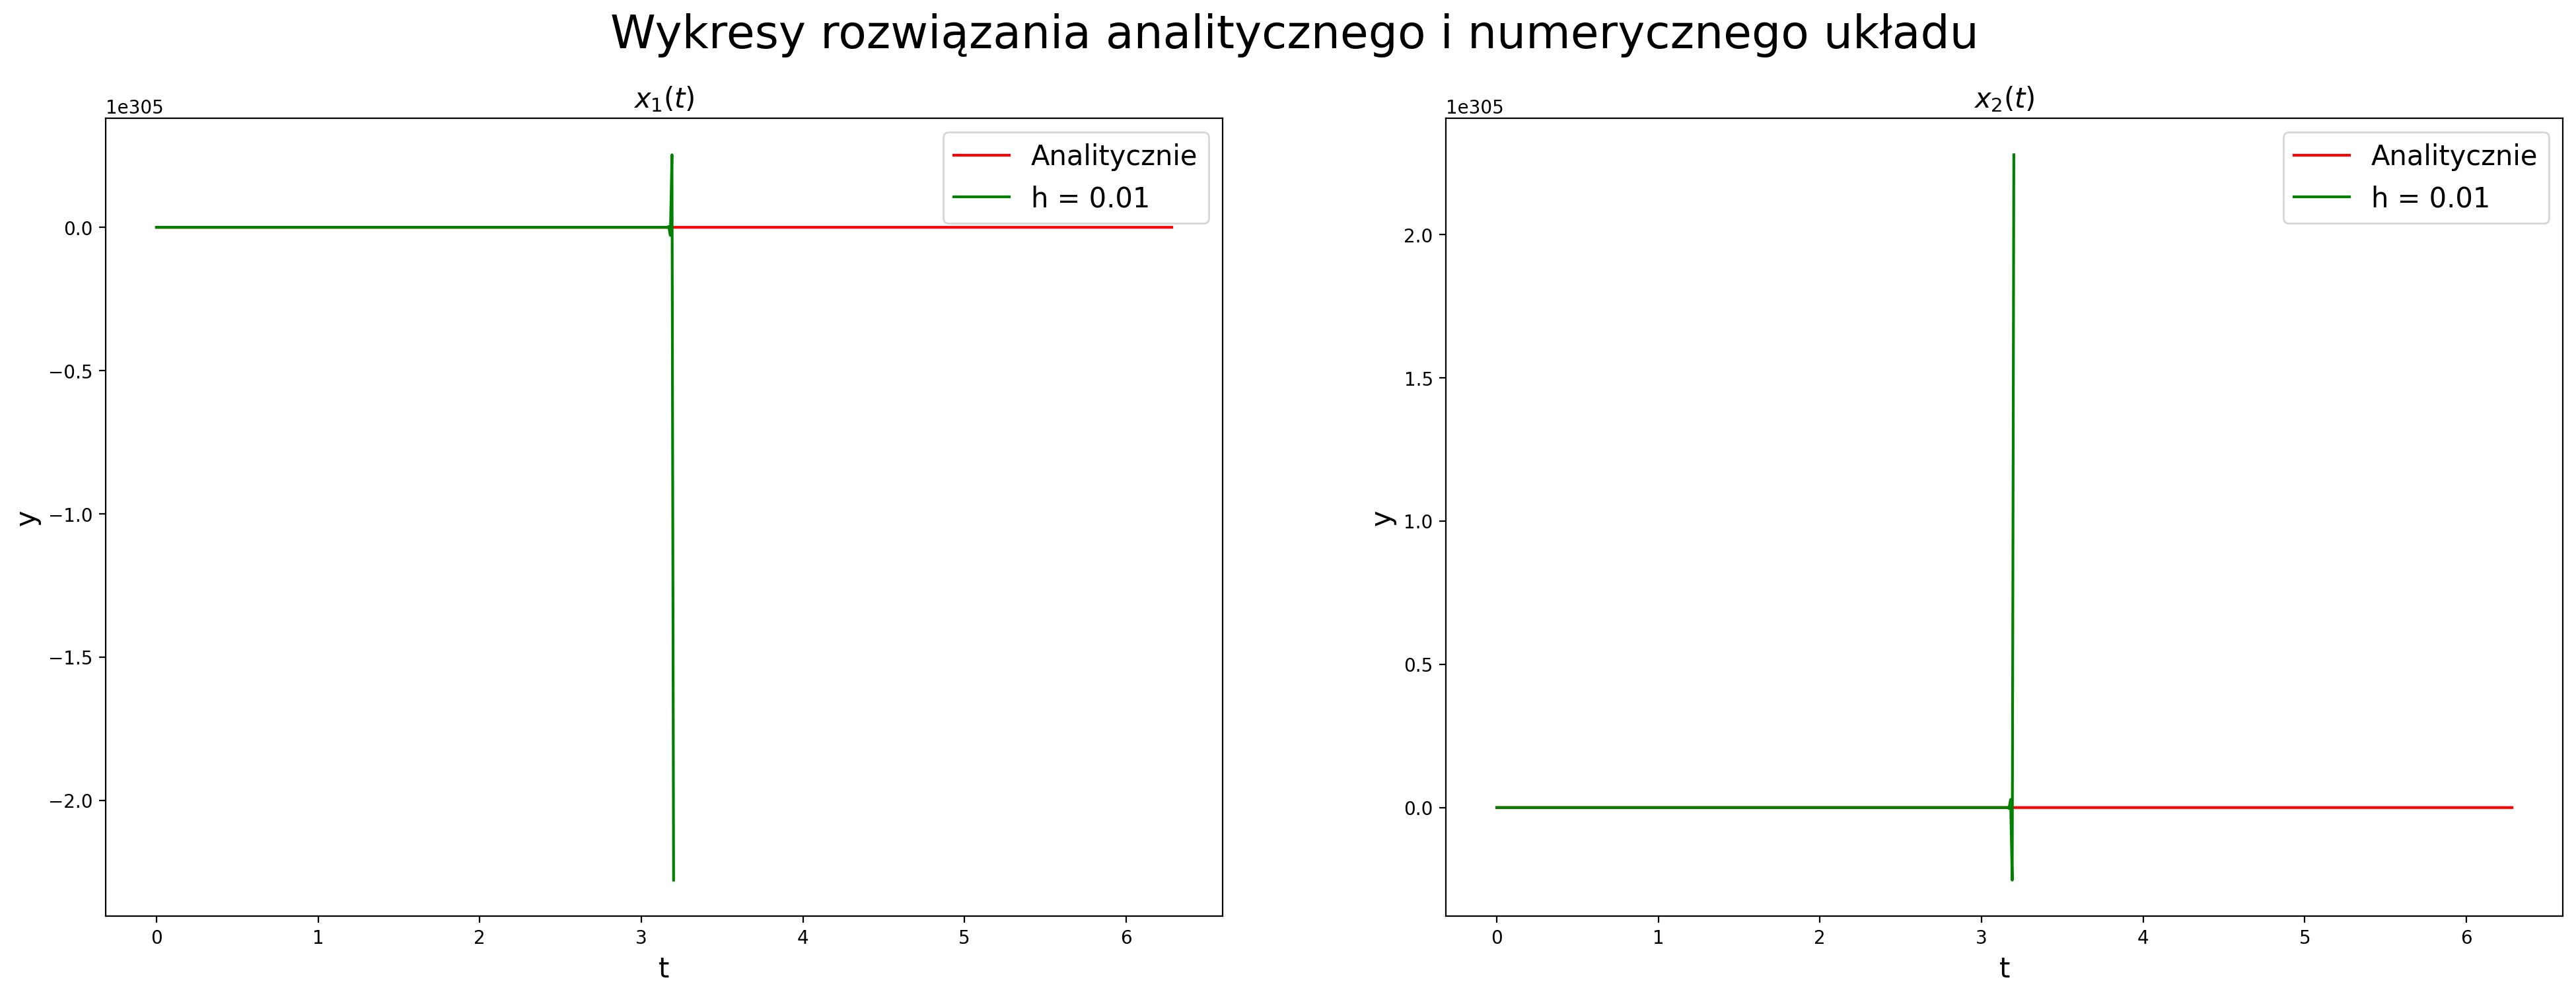

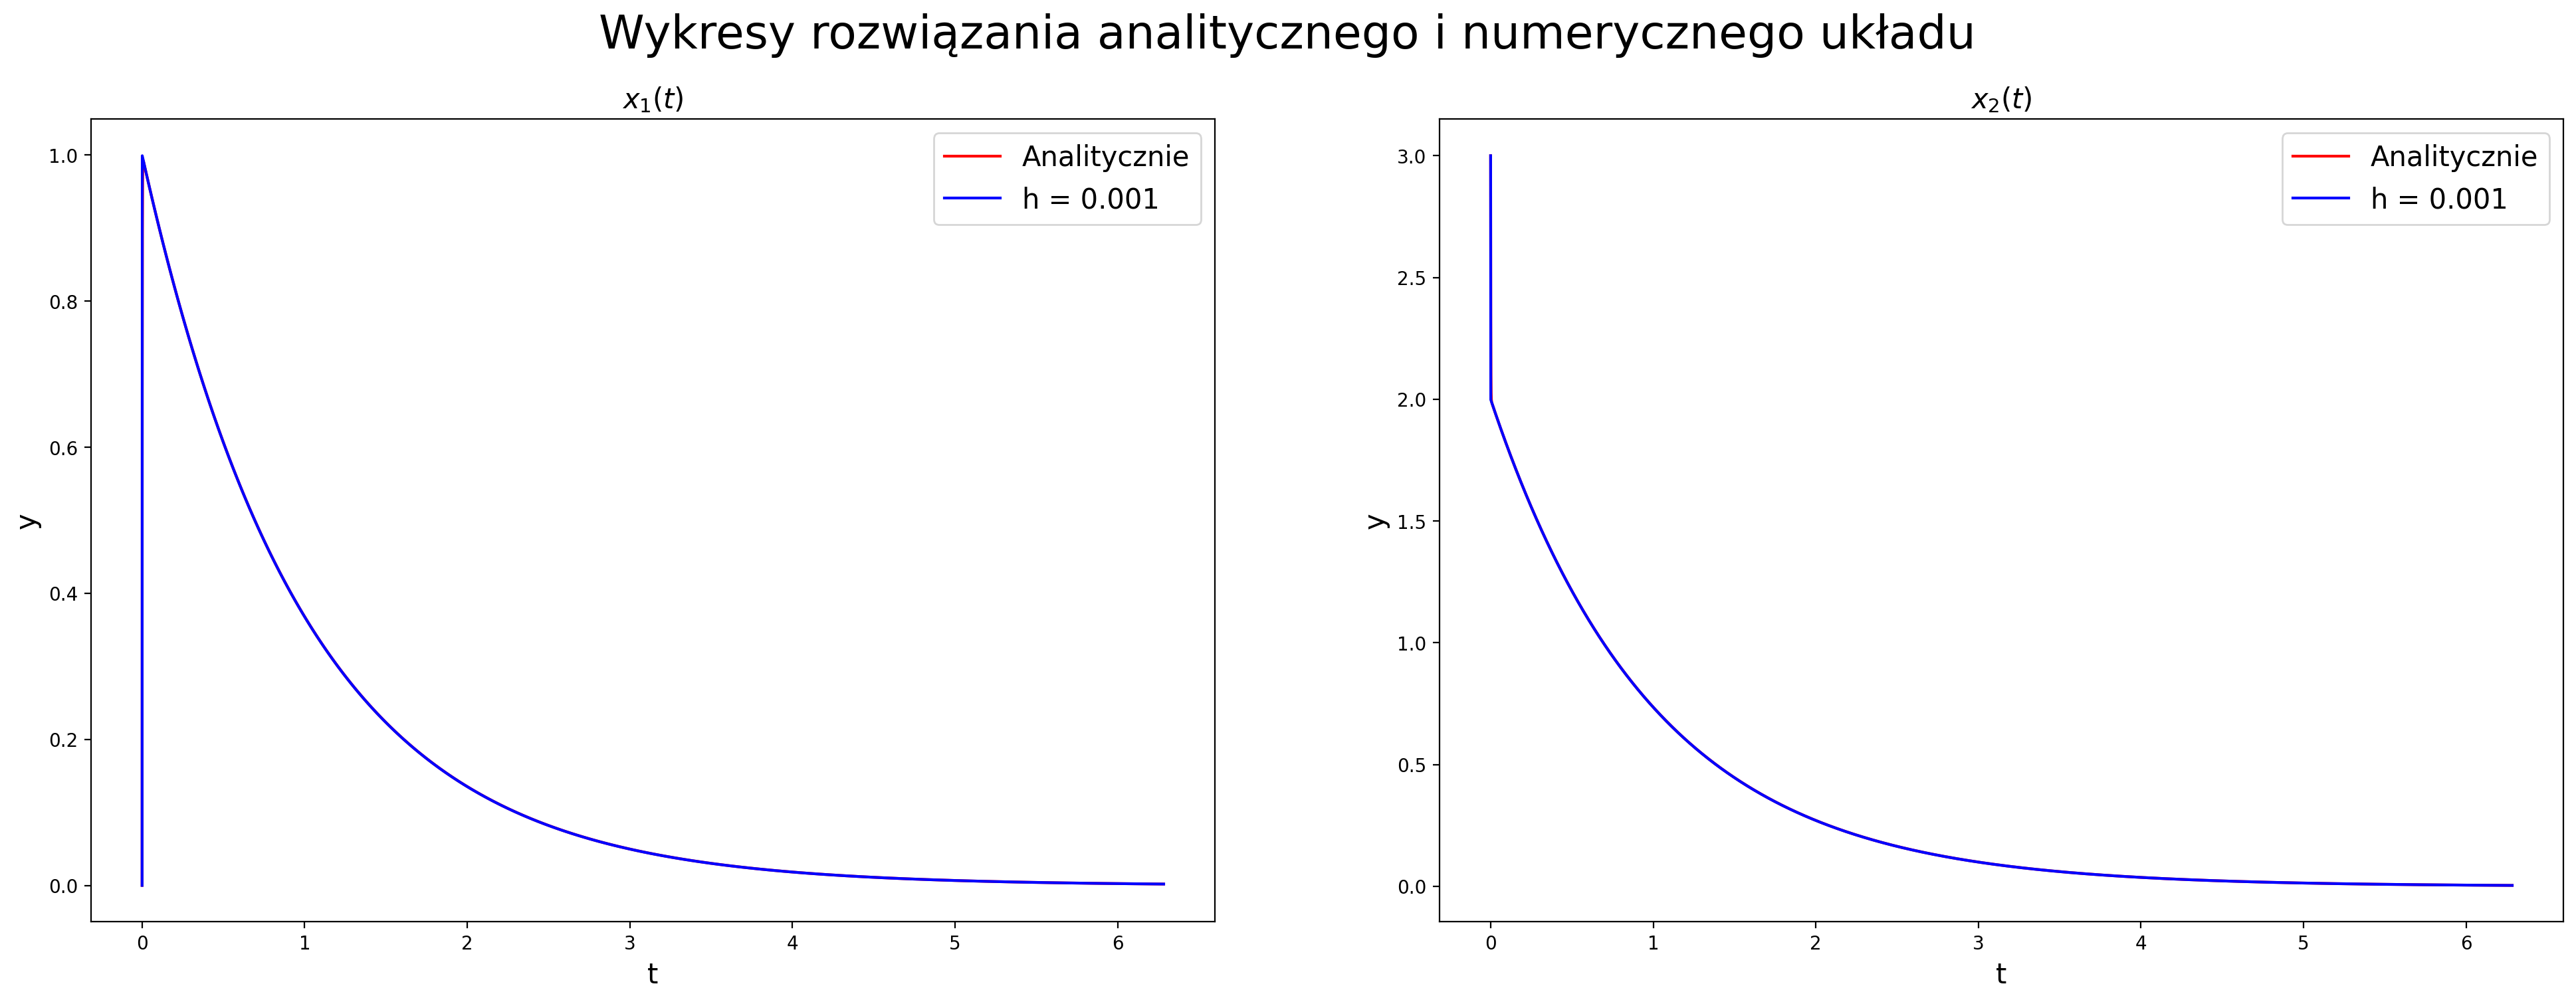

Uwarunkowanie macierzy A wynosi:
1110.889099820079


In [29]:
def fun(t,y):
    yr = [-667 * y[0] + 333 * y[1], 666 * y[0] - 334 * y[1]]
    return np.array(yr)

def sol(t):
    yr = [np.exp(-t) - np.exp(-1000 * t), 2 * np.exp(-t) + np.exp(-1000 * t)]
    return np.array(yr)

color = ['g','b']
y0 = np.array([0, 3])
legend = [['Analitycznie','h = 0.01'],['Analitycznie','h = 0.001']]
for h,color,legend in zip([0.01,0.001],color,legend):
    fig, ax = plt.subplots(1, 2, figsize=(24, 8), dpi=200)
    t = np.arange(0,2*np.pi+0.00001,0.00001)
    solution = sol(t)
    ax[0].plot(t,solution[0],color='r')
    ax[1].plot(t,solution[1],color='r')
    t = np.arange(0,2*np.pi+h,h)
    x = main.solve_euler(fun,t,y0)
    ax[0].plot(t,x[:,0],color=color)
    ax[1].plot(t,x[:,1],color=color)
    ax[0].legend(legend,fontsize=15,loc='best')
    ax[1].legend(legend,fontsize=15,loc='best')
    ax[0].set_xlabel('t',fontsize=15)
    ax[1].set_xlabel('t',fontsize=15)
    ax[0].set_ylabel('y',fontsize=15)
    ax[1].set_ylabel('y',fontsize=15)
    ax[0].set_title('$x_1(t)$',fontsize=15)
    ax[1].set_title('$x_2(t)$',fontsize=15)
    fig.suptitle('Wykresy rozwiązania analitycznego i numerycznego układu',fontsize=25)
    plt.show()
print('Uwarunkowanie macierzy A wynosi:')
print(np.linalg.cond(np.array([[-667, 333], [666, -334]])))

Dokładne rozwiązanie zadanego problemu można obliczyć stosując wzór na rozwiązanie jednorodnego układu równań różniczkowych, przedstawiony poniżej:
$$
x(t) = e^{At}
$$
Ponieważ jednak macierz A posiada dwie rzeczywiste wartości własne, rozwiązanie można wyznaczyć w bardzo prosty sposób, co zostało zrobione otrzymując funkcje:
$$
\left\{ \begin{array}{ll}
x_1(t) = e^{-t} - e^{-1000t}\\
x_2(t) = 2e^{-t} + e^{-1000t}\\
\end{array} \right.
$$
Z uwagi na bardzo złe uwarunkowanie macierzy A układu, kiedy zastosujemy zbyt mały krok dla metody Eulera, na przykład h = 0.01, rozwiązanie bardzo szybko 'wystrzeliwuje' w kierunku nieskończoności zwracając nieakceptowalne wyniki. Dla kroku h = 0.001 rozwiązanie udało się jednak przybliżyć z bardzo dobrą dokładnością.

***Zadanie 5.***

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

In [30]:
def fun(t,y):
    mi = 0.012277471
    mi_ = 1 - mi
    D_1 = ((y[0] + mi) ** 2 + y[2] ** 2) ** (3/2)
    D_2 = ((y[0] - mi_) ** 2 + y[2] ** 2) ** (3/2)
    yr = [y[1], y[0] + 2 * y[3] - mi_ * ((y[0] + mi)/D_1) - mi * ((y[0] - mi_)/D_2), y[3], y[2] - 2 * y[1] - mi_ * (y[2]/D_1) - mi * (y[2]/D_2)]
    return np.array(yr)

T = 17.0652165601579625588917206249
t = np.arange(0,T+0.000001,0.000001)
y0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
x = main.solve_euler(fun,t,y0)

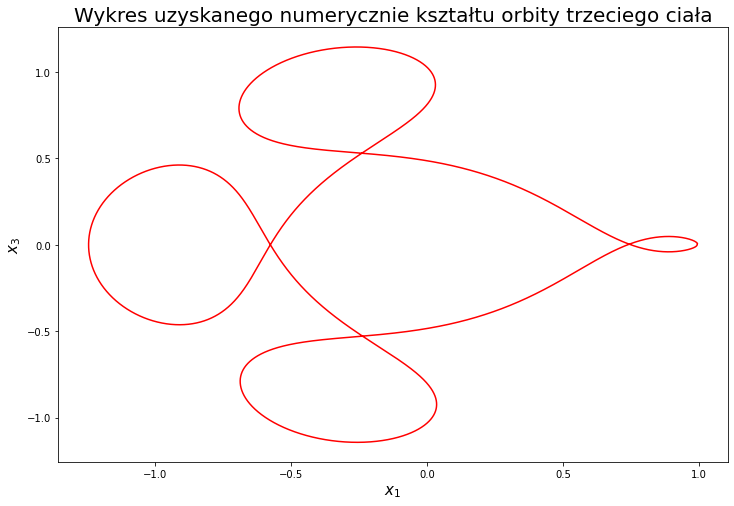

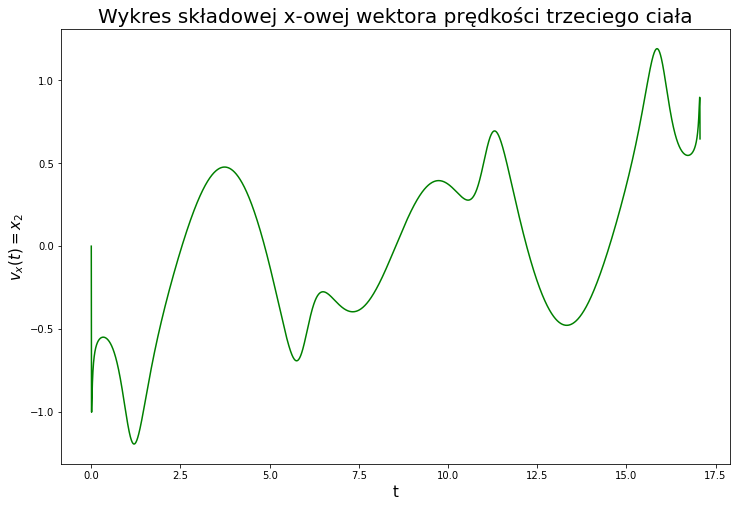

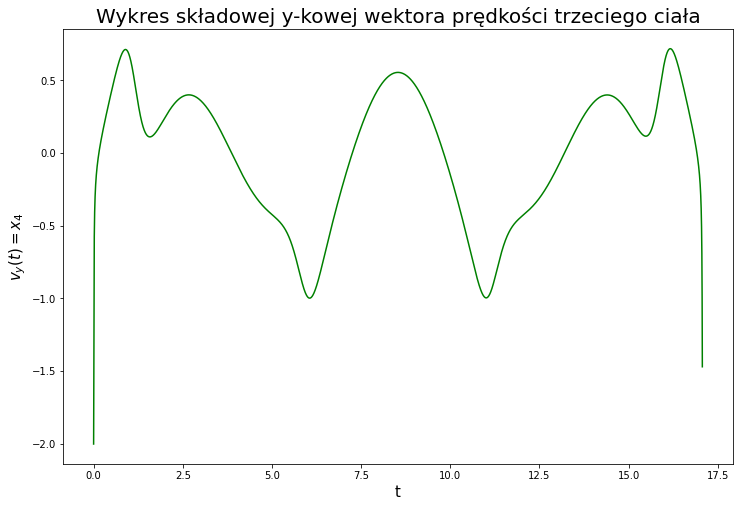

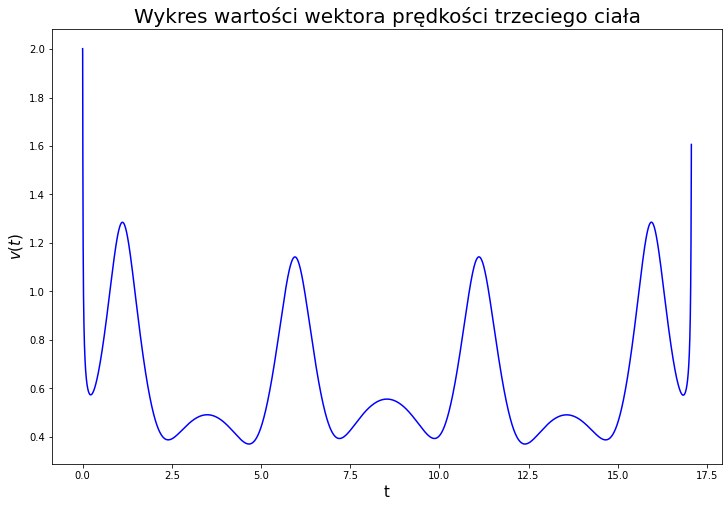

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(x[:, 0], x[:, 2],'r')
plt.title('Wykres uzyskanego numerycznie kształtu orbity trzeciego ciała',fontsize=20)
plt.xlabel('$x_1$',fontsize=15)
plt.ylabel('$x_3$',fontsize=15)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t,x[:, 1],'g')
plt.title('Wykres składowej x-owej wektora prędkości trzeciego ciała',fontsize=20)
plt.xlabel('t',fontsize=15)
plt.ylabel('$v_x(t) = x_2$',fontsize=15)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(t,x[:, 3],'g')
plt.title('Wykres składowej y-kowej wektora prędkości trzeciego ciała',fontsize=20)
plt.xlabel('t',fontsize=15)
plt.ylabel('$v_y(t) = x_4$',fontsize=15)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t,np.sqrt(x[:, 1] ** 2 + x[:, 3] ** 2),'b')
plt.title('Wykres wartości wektora prędkości trzeciego ciała',fontsize=20)
plt.xlabel('t',fontsize=15)
plt.ylabel('$v(t)$',fontsize=15)
plt.show()

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
